In [2]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-200-1.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Phenol waste,Unnamed: 6,SachOL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-360,0.000000,1.0,48.000000,0.000,0.000000,3813.93,--,29041.0,7.614455,--
1,0,6.000000,64150.8,47.677740,433.603,0.322260,3617.27,0,28664.8,7.924429,NaN
2,273,10.550000,25201.9,47.593048,215.493,0.406952,1491.86,0,11312.4,7.582749,NaN
3,523,14.716667,25069.8,47.460577,284.936,0.539423,1497.99,0,11289.5,7.536432,NaN
4,773,18.883333,25132.7,47.333405,353.943,0.666595,1497.71,0,11319.9,7.558139,NaN


In [3]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Waste,Unnamed: 6,SachOL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-360,0.000000,1.0,48.000000,0.000,0.000000,3813.93,--,29041.0,7.614455,--
1,0,6.000000,64150.8,47.677740,433.603,0.322260,3617.27,0,28664.8,7.924429,NaN
2,273,10.550000,25201.9,47.593048,215.493,0.406952,1491.86,0,11312.4,7.582749,NaN
3,523,14.716667,25069.8,47.460577,284.936,0.539423,1497.99,0,11289.5,7.536432,NaN
4,773,18.883333,25132.7,47.333405,353.943,0.666595,1497.71,0,11319.9,7.558139,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        6.860279e-04 8.551478e-06
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   6
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb7dc35be50>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb7dc35bf10>

Goodness of fit qualifiers:
chi_squared            0.032385766370083766
objective_value        0.016192883185041883
r_squared              0.9914615742203104


<IPython.core.display.Javascript object>


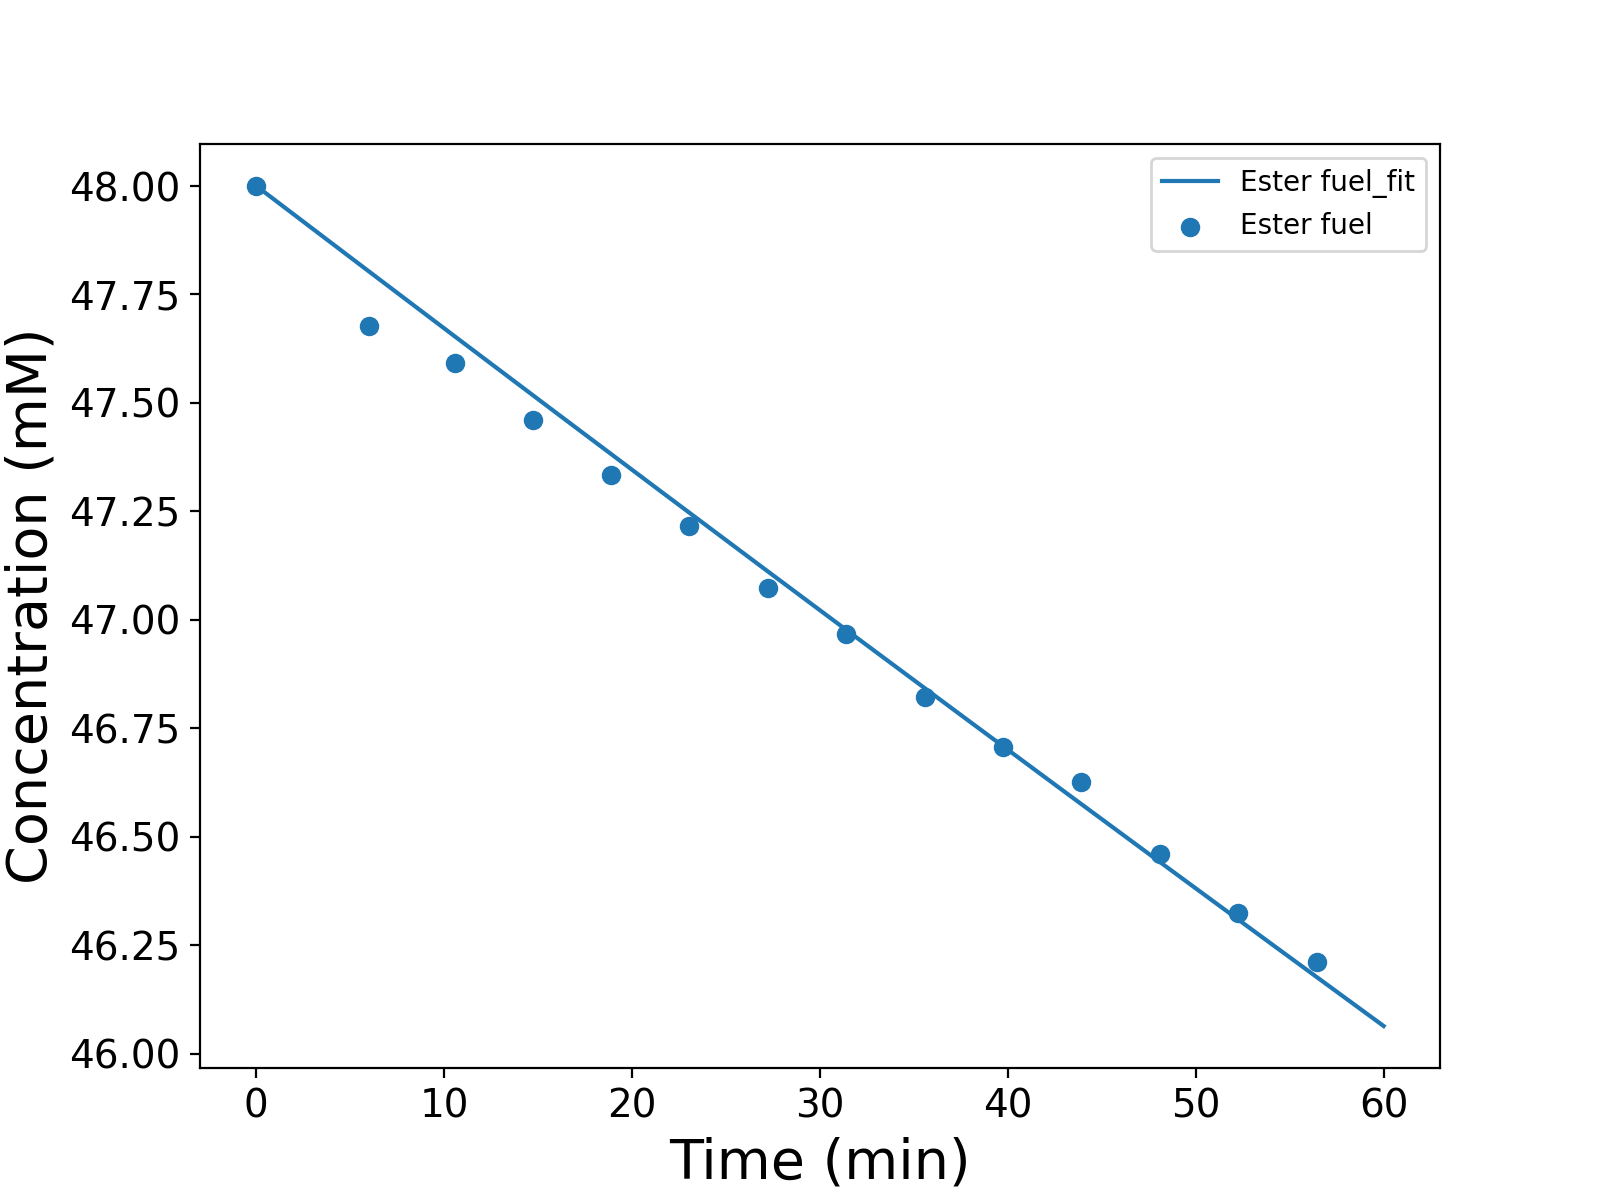

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-200-1 (pH 6.10) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [5]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-200-2.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-480,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--,--,--
1,0,8.000000,63100.1,46.998455,391.628,0.291694,953.046,0.709851,24719.4,0,NaN
2,273,12.550000,26812.4,46.508313,282.702,0.490370,577.267,1.001317,10696.8,0,NaN
3,523,16.716667,26556.4,46.289658,229.402,0.399864,751.822,1.310478,10707.3,0,NaN
4,773,20.883333,26421.6,45.973362,258.328,0.449489,906.412,1.577149,10699.1,0,NaN


In [6]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,-480,0.000000,1.0,48.000000,0.000,0.000000,0.000,0.000000,--,--,--
1,0,8.000000,63100.1,46.998455,391.628,0.291694,953.046,0.709851,24719.4,0,NaN
2,273,12.550000,26812.4,46.508313,282.702,0.490370,577.267,1.001317,10696.8,0,NaN
3,523,16.716667,26556.4,46.289658,229.402,0.399864,751.822,1.310478,10707.3,0,NaN
4,773,20.883333,26421.6,45.973362,258.328,0.449489,906.412,1.577149,10699.1,0,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        1.968300e-03 2.441297e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   7
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb7b9b7f430>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb7b9b7f610>

Goodness of fit qualifiers:
chi_squared            0.2646296176662114
objective_value        0.1323148088331057
r_squared              0.9911801123924494


<IPython.core.display.Javascript object>


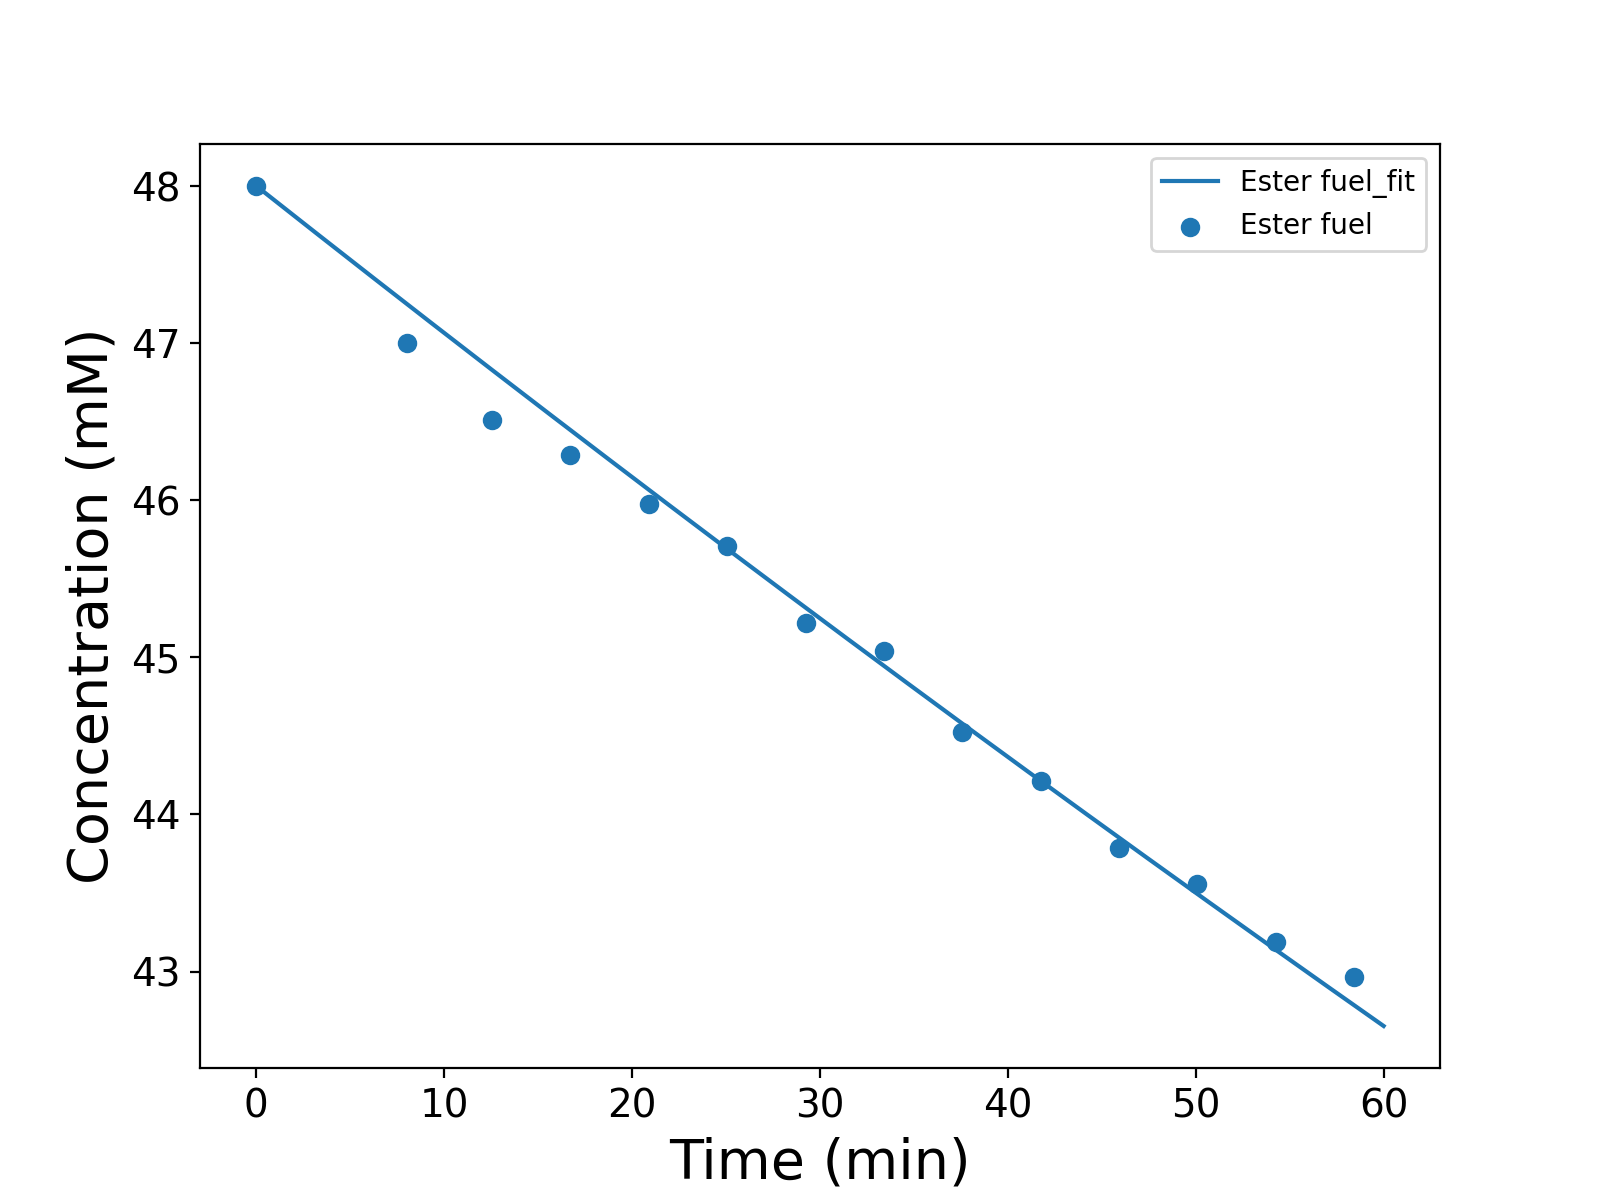

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-200-2 (pH 6.55) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [1]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-202-3.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8
0,-360,0.000000,1.0,48.000000,0.000,0.000000,0.00,0.000000,--
1,0,6.000000,70249.5,46.122137,957.118,0.628393,1903.09,1.249469,NaN
2,272,10.533333,36697.0,44.899628,935.351,1.144424,1598.62,1.955949,NaN
3,522,14.700000,35848.5,44.075731,1011.920,1.244156,2179.84,2.680113,NaN
4,773,18.883333,34961.8,43.160019,1166.650,1.440219,2753.98,3.399763,NaN


In [2]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()


,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8
0,-360,0.000000,1.0,48.000000,0.000,0.000000,0.00,0.000000,--
1,0,6.000000,70249.5,46.122137,957.118,0.628393,1903.09,1.249469,NaN
2,272,10.533333,36697.0,44.899628,935.351,1.144424,1598.62,1.955949,NaN
3,522,14.700000,35848.5,44.075731,1011.920,1.244156,2179.84,2.680113,NaN
4,773,18.883333,34961.8,43.160019,1166.650,1.440219,2753.98,3.399763,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        5.259445e-03 5.798277e-05
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   5
Objective              <symfit.core.objectives.LeastSquares object at 0x7fd97c9a7d30>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fd97c9a7fd0>

Goodness of fit qualifiers:
chi_squared            1.0215103704227528
objective_value        0.5107551852113764
r_squared              0.994174881359038


<IPython.core.display.Javascript object>


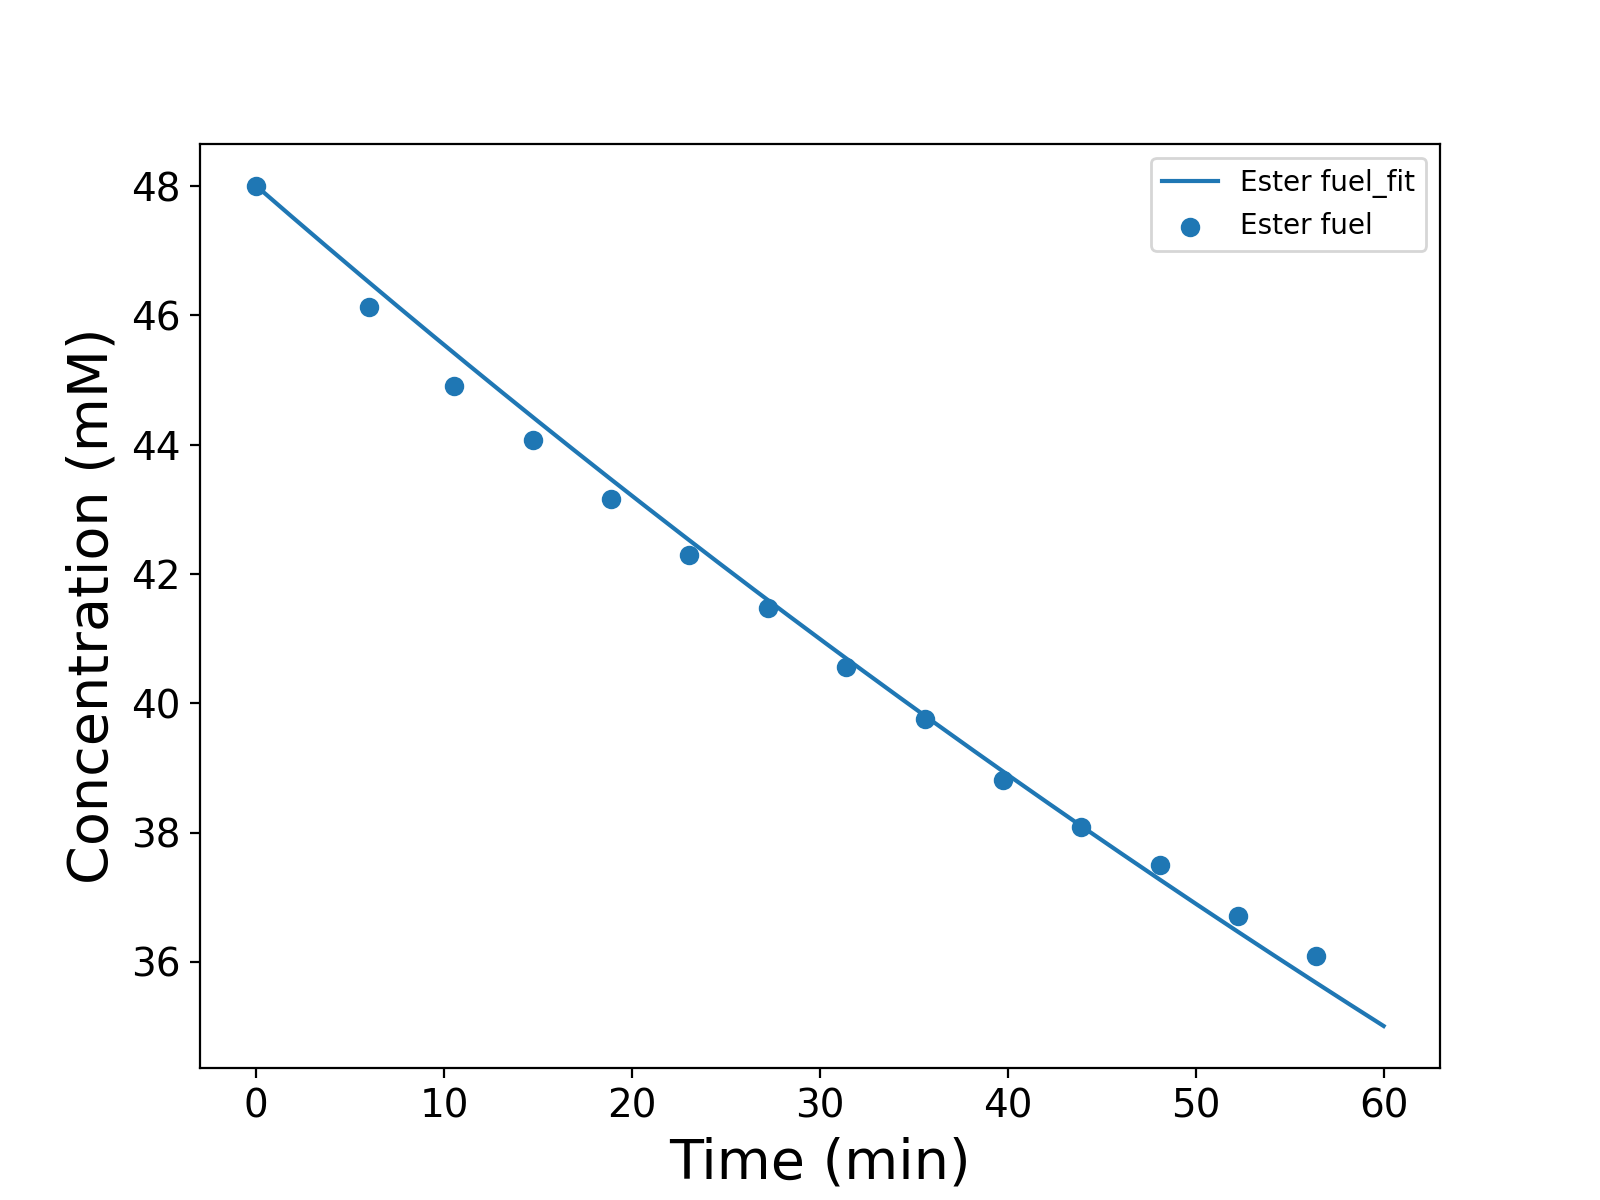

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-202-3 (pH 7.00) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()

In [8]:
import pandas as pd
import numpy as np

reaction_data = pd.read_csv('02-200-4.csv', sep=',')
reaction_data.head()

,Unnamed: 0,Time (min),Unnamed: 2,Ester fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Phenol waste,Unnamed: 8,SachOL,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,-360,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,4209.08,--,26087.3,6.197863,--
1,0,6.000000,37053.3,35.098974,2854.46,2.703905,10764.90,10.197120,3532.66,0,22125.8,6.263212,NaN
2,271,10.516667,14992.6,28.913311,2011.06,3.878340,7886.08,15.208349,1879.71,0,11185.2,5.950492,NaN
3,521,14.683333,12288.1,24.040419,2290.86,4.481835,9955.92,19.477746,1887.81,0,11225.5,5.946308,NaN
4,771,18.850000,10209.6,20.105001,2473.07,4.870032,11692.40,23.024968,1866.39,0,11194.0,5.997675,NaN


In [9]:
reaction_data.rename(columns={"Time (min)":"Time", "Ester fuel":"Fuel", "Phenol waste":"Waste", "Ester fuel (old way)":"Fuel_old", "Byproducts (old way)":"Byproduct_old", "Phenol waste (old way)":"Waste_old"}, inplace=True)
reaction_data.head()

,Unnamed: 0,Time,Unnamed: 2,Fuel,Unnamed: 4,Fuel dimer,Unnamed: 6,Waste,Unnamed: 8,SachOL,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,-360,0.000000,1.0,48.000000,0.00,0.000000,0.00,0.000000,4209.08,--,26087.3,6.197863,--
1,0,6.000000,37053.3,35.098974,2854.46,2.703905,10764.90,10.197120,3532.66,0,22125.8,6.263212,NaN
2,271,10.516667,14992.6,28.913311,2011.06,3.878340,7886.08,15.208349,1879.71,0,11185.2,5.950492,NaN
3,521,14.683333,12288.1,24.040419,2290.86,4.481835,9955.92,19.477746,1887.81,0,11225.5,5.946308,NaN
4,771,18.850000,10209.6,20.105001,2473.07,4.870032,11692.40,23.024968,1866.39,0,11194.0,5.997675,NaN


Derivative(fuel, t; k1) = -k1*fuel

Parameter Value        Standard Deviation
k1        4.479293e-02 6.734742e-04
Status message         Desired error not necessarily achieved due to precision loss.
Number of iterations   4
Objective              <symfit.core.objectives.LeastSquares object at 0x7fb7e8401f70>
Minimizer              <symfit.core.minimizers.BFGS object at 0x7fb7e8401e50>

Goodness of fit qualifiers:
chi_squared            8.027524373632893
objective_value        4.013762186816447
r_squared              0.9962175274934247


<IPython.core.display.Javascript object>


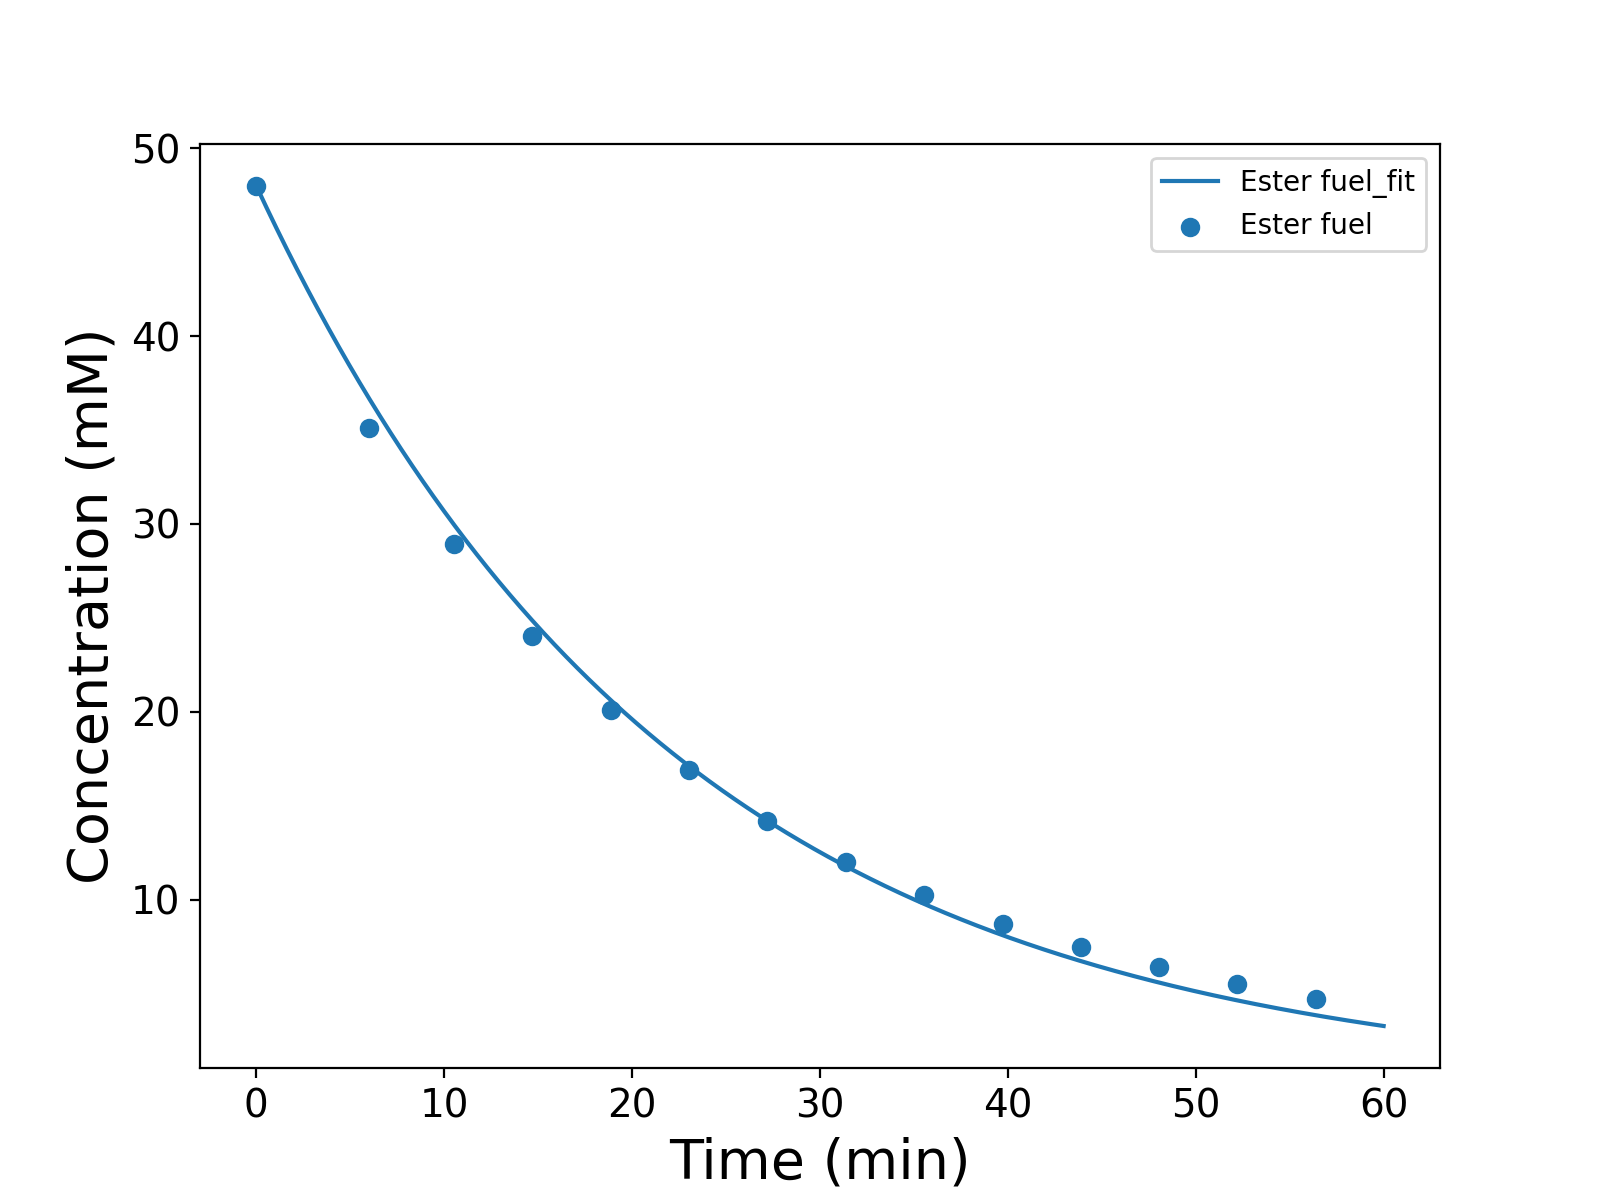

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from symfit import parameters, variables, Fit, D, ODEModel

%matplotlib nbagg

"""
Fitting to SA02-200-4 (pH 7.90) based on concentration. The concentration was calculated WITHOUT an external standard.
k1 is the pseudo-first order rate constant for the hydrolysis of the ester fuel. 
"""

t, fuel = variables('t, fuel')
k1, k2 = parameters('k1, k2')
k1.value = 0.007

t_data = np.array(reaction_data.Time, dtype=np.float64)
fuel_data = np.array(reaction_data.Fuel, dtype=np.float64)

t0 = 0.0
fuel0 = 48.0

model_dict = {
    D(fuel, t): -k1*fuel
}

ode_model = ODEModel(model_dict, initial={t: t0, fuel: fuel0})
print(ode_model)
fit = Fit(ode_model, t=t_data, fuel=fuel_data)
fit_result = fit.execute()
print(fit_result)

tvec = np.linspace(0.0, 60.0, 10000)
fuel, = ode_model(t=tvec, **fit_result.params)

fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(tvec, fuel, label='Ester fuel_fit')
ax.scatter(t_data, fuel_data, label='Ester fuel')

ax.set_xlabel('Time (min)', fontsize=20, fontweight='normal')
ax.set_ylabel('Concentration (mM)', fontsize=20, fontweight='normal')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.legend(loc='best')
plt.show()